#### 참고 : tensorflow.keras 공식 문서 (Official API Docs) @ https://www.tensorflow.org/api_docs/python/tf/keras

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

<br> 

#### 1. Prepare train & test data (MNIST)

#### Train & Test split

In [2]:
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

#### Normalization

In [3]:
train_data = train_data.reshape(60000, 784) / 255.0
test_data = test_data.reshape(10000, 784) / 255.0

#### One-hot encoding

In [4]:
train_label = utils.to_categorical(train_label) # 0~9 -> one-hot vector
test_label = utils.to_categorical(test_label) # 0~9 -> one-hot vector

<br> 

#### 2. Build the model & Set the criterion

In [7]:
model = models.Sequential() 

model.add(layers.Dense(input_dim=28*28, units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(units=10, activation='softmax')) # 0~9 

In [10]:
model.compile(optimizer=optimizers.Adam(0.001), 
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy]) # Precision / Recall / F1-Score 적용하기 @ https://j.mp/3cf3lbi

# model.compile(optimizer='adam', 
#               loss=losses.categorical_crossentropy, 
#               metrics=['accuracy'])

<br> 

#### 3. Train the model

In [11]:
# Training 과정에서 epoch마다 활용할 validation set을 나눠줄 수 있습니다.

history = model.fit(train_data, train_label, batch_size=100, epochs=15, validation_split=0.2) 

Epoch 1/15
480/480 [==============================] - 7s 10ms/step - loss: 0.2948 - categorical_accuracy: 0.9120 - val_loss: 0.1282 - val_categorical_accuracy: 0.9601
Epoch 2/15
480/480 [==============================] - 5s 9ms/step - loss: 0.1259 - categorical_accuracy: 0.9617 - val_loss: 0.0945 - val_categorical_accuracy: 0.9707
Epoch 3/15
480/480 [==============================] - 5s 9ms/step - loss: 0.0906 - categorical_accuracy: 0.9715 - val_loss: 0.0852 - val_categorical_accuracy: 0.9729
Epoch 4/15
480/480 [==============================] - 5s 9ms/step - loss: 0.0734 - categorical_accuracy: 0.9766 - val_loss: 0.0824 - val_categorical_accuracy: 0.9749
Epoch 5/15
480/480 [==============================] - 5s 9ms/step - loss: 0.0580 - categorical_accuracy: 0.9818 - val_loss: 0.0902 - val_categorical_accuracy: 0.9724
Epoch 6/15
480/480 [==============================] - 5s 9ms/step - loss: 0.0516 - categorical_accuracy: 0.9828 - val_loss: 0.0894 - val_categorical_accuracy: 0.9752
Epo

<br> 

#### 4. Test the model

In [12]:
result = model.evaluate(test_data, test_label, batch_size=100)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

100/100 [==============================] - 1s 6ms/step - loss: 0.0742 - categorical_accuracy: 0.9786
loss (cross-entropy) : 0.07416006177663803
test accuracy : 0.978600025177002


<br> 

#### 5. Visualize the result

In [14]:
history.history

{'loss': [0.294761598110199,
  0.12587575614452362,
  0.090582937002182,
  0.07341267168521881,
  0.057991430163383484,
  0.05164529010653496,
  0.04739324375987053,
  0.03983412683010101,
  0.03603261709213257,
  0.032870855182409286,
  0.02849264070391655,
  0.027931606397032738,
  0.025091873481869698,
  0.024195263162255287,
  0.02354385331273079],
 'categorical_accuracy': [0.9120000004768372,
  0.9617291688919067,
  0.9714999794960022,
  0.976604163646698,
  0.9818124771118164,
  0.9828333258628845,
  0.984458327293396,
  0.9869999885559082,
  0.9882916808128357,
  0.9889999628067017,
  0.9908333420753479,
  0.9900624752044678,
  0.9918541312217712,
  0.9916666746139526,
  0.9920833110809326],
 'val_loss': [0.12815499305725098,
  0.09447205811738968,
  0.08515597134828568,
  0.08236753940582275,
  0.09018659591674805,
  0.08938217908143997,
  0.07538972795009613,
  0.07961098849773407,
  0.0845784842967987,
  0.07943682372570038,
  0.08493349701166153,
  0.08083532005548477,
  0.0

In [16]:
history.history['loss'] # dic 자료구조

[0.294761598110199,
 0.12587575614452362,
 0.090582937002182,
 0.07341267168521881,
 0.057991430163383484,
 0.05164529010653496,
 0.04739324375987053,
 0.03983412683010101,
 0.03603261709213257,
 0.032870855182409286,
 0.02849264070391655,
 0.027931606397032738,
 0.025091873481869698,
 0.024195263162255287,
 0.02354385331273079]

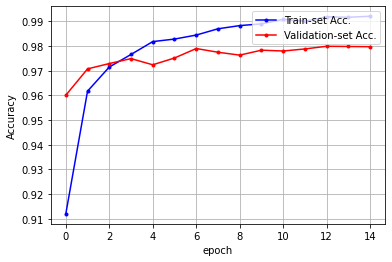

In [17]:
val_acc = history.history['val_categorical_accuracy']
acc = history.history['categorical_accuracy']

import numpy as np
import matplotlib.pyplot as plt

x_len = np.arange(len(acc))
plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()